In [9]:
Text = "The FAANG stocks won’t see much more growth in the near future, according to Bill Studebaker, founder and Chief Investment Officer of Robo Global. \
Studebaker argues we are seeing a 'reallocation' that will continue from large-cap tech stocks into market-weight stocks. \
The FAANG stocks have had a rough few weeks, and have been hit hard since March 12. \
One FAANG to look out for, in the midst of all this, is Amazon, according to Studebaker. \
The stock market is seeing a 'reallocation' out of FAANG stocks, which are not where the smart money is, founder and Chief Investment Officer of Robo Global Bill Studebaker told Business Insider. \
The FAANG stocks (Facebook, Apple, Amazon, Netflix, Google) are all down considerably since March 12, a trend that accelerated when news of a massive Facebook data scandal broke, sending the tech-heavy Nasdaq into a downward frenzy. \
Investors are wondering what’s next. \
And what’s next isn’t good news for FAANG stock optimists, Studebaker thinks. 'This is a dead trade' for the next several months, he said. 'I wouldn’t expect there to be a lot of performance attribution coming from the FAANG stocks,' he added. That is, if the stock market is to see gains in the next several months, they will largely not come from the big tech companies. \
The market is seeing a 'reallocation out of large-cap technology, into other parts of the market,' he said. And this trend could continue for the foreseeable future. 'When you get these reallocation trades, a de-risking, this can go on for months and months.' The FAANG’s are pricey stocks, he said, pointing out that investors will 'factor in the law of big numbers,' he said. 'Just because they’re big cap doesn’t mean they’re safe,' he added. \
Still, he doesn’t necessarily think that investors are going to shift drastically into value stocks. 'With an increasingly favorable macro backdrop, you have strong growth demand.' \
Studebaker, who runs an artificial intelligence and robotics exchange-traded fund with $4 billion in assets under management, thinks that AI and robotics are better areas of growth. His ETF is up 27% in the past year, while the FAANG stocks are also largely up over that same span, even if they are down since March 12. \
While many point to artificial intelligence as an area that will be a boost to Google and Amazon, Studebaker doesn’t see that as a sign of significant growth for the FAANGs. He pointed out that 'eighty to ninety percent of their businesses are still search,' and that 'AI doesn’t really move the needle on the business.' He also said 'the revenue mix [attributable to AI] in those businesses are insignificant.' \
And while he’s not bullish on FAANG’s, he does say that the one FAANG to still watch out for is Amazon, simply because ecommerce still represents a small portion of the global retail market, giving the company room to grow." 



In [14]:
import nltk
import re
from nltk.tokenize import TreebankWordTokenizer

# 마침표(.)를 기준으로 문장 분리
def get_sentences(txt):
    return txt.split('.')

# Treebank tokenizer로 토큰으로 분리
def get_words(txt):
    return TreebankWordTokenizer().tokenize(txt)

# 단어(토큰)의 가중치 계산 및 범위에 포함되는 토큰 식별
def get_keywords(word_list , min_ratio=0.001, max_ratio=0.5) :
    assert (min_ratio < 1 and max_ratio < 1) #반드시 꼭 지켜야 하는 '제약 조건'
    
    # 토큰별로 빈도수 카운팅
    count_dict = {}
    for word in word_list:
        count_dict.setdefault(word , 0)
        count_dict[word] +=1
        
    #print(count_dict)
    #print(len(word_list))
    # 분석 문서의 총 토큰수 대비 해당 토큰의 빈도 비율
    keywords = set()
    for word , cnt in count_dict.items():
        word_percentage = count_dict[word]* 1.0 / len (word_list)
        
        #print(word_percentage)
        # 사전 정의한 비율내에 포함 된 경우 키워드에 추가
        if word_percentage <= max_ratio and word_percentage >=min_ratio:
            keywords.add(word)
    return keywords
# 문장의 가중치 계산
def get_sentence_weight (sentence , keywords):
    sen_list = sentence.split(' ')
    window_start = 0; window_end = -1;
    
    # 문장내에서 윈도 시작 위치 탐색
    # 범위내 속한 키워드가 등장하는 첫번째 위치 계산
    for i in range(len(sen_list)):
        if sen_list[i] in keywords:
            window_start = i
            break
            
    # 문장내에서 윈도 종료 위치 탐색
    # 범위내 속한 키워드가 등장하는 마지막 위치 계산
    for i in range(len(sen_list) - 1 , 0 , -1) :
        if sen_list[i] in keywords:
            window_end = i
            break
            
    # 윈도의 시작위치가 종료위치보다 큰경우 => 분석할 단어(토큰)가 없는 경우 종료
    if window_start > window_end :
        return 0
    # 윈도 크기 계산
    window_size = window_end - window_start + 1
    
    # 분석 대상 문장 중 범위(0.001 ~ 0.5)에 포함된 토큰 개수 카운팅
    keywords_cnt =0
    for w in sen_list :
        if w in keywords:
            keywords_cnt +=1
            
    # (분석 대상 문장 중 범위(0.001 ~ 0.5)에 포함된 토큰 개수) / 윈도사이즈
    return keywords_cnt*keywords_cnt *1.0 / window_size
# 문서 요약
def summarize(content ,max_no_of_sentences = 10):
    txt = content
    # 단어(토큰) 분리
    word_list = get_words(txt)
    
    # 단어(토큰) 가중치 계산 및 범위 내 포함 단어(토큰) 추출
    keywords = get_keywords(word_list , 0.01 , 0.5)
    print(keywords)
    sentence_list = get_sentences(txt)
    sentence_weight = []
    
    # 문장별 가중치 계산
    for sen in sentence_list :
        sentence_weight.append ((get_sentence_weight(sen , keywords) ,sen))
        
    # 문장별 가중치 역순 계산
    sentence_weight.sort(reverse = True)
    
    #print(sentence_weight)
    ret_list = []
    ret_cnt = min(max_no_of_sentences , len(sentence_list))
    for i in range (ret_cnt) :
        ret_list.append (str(sentence_weight[i][0]) + ' : ' + sentence_weight[i][1])
    return ret_list

In [15]:

slist = summarize (Text , 10)
for s in slist :
    print(s)

{"'", '’', 'the', 'are', 'and', 'a', 't', 'for', 'that', 'is', 'FAANG', 'out', 'of', ',', 'stocks', 'he', 'to', 'The', 'in', 'Studebaker'}
5.0625 :  One FAANG to look out for, in the midst of all this, is Amazon, according to Studebaker
4.9 : ' And while he’s not bullish on FAANG’s, he does say that the one FAANG to still watch out for is Amazon, simply because ecommerce still represents a small portion of the global retail market, giving the company room to grow
4.761904761904762 : ' The FAANG’s are pricey stocks, he said, pointing out that investors will 'factor in the law of big numbers,' he said
4.481481481481482 :  While many point to artificial intelligence as an area that will be a boost to Google and Amazon, Studebaker doesn’t see that as a sign of significant growth for the FAANGs
4.172413793103448 :  The stock market is seeing a 'reallocation' out of FAANG stocks, which are not where the smart money is, founder and Chief Investment Officer of Robo Global Bill Studebaker told 

# textRank

In [16]:
from nltk.tokenize import sent_tokenize
import numpy as np
import re
from operator import itemgetter

In [17]:
# 코사인 유사도 (1. 단어의 표현 예제 참고)
def cosine_similarity(x, y):
    
    # x와 y, 두 벡터의 코사인 유사도를 계산하는 함수
    nominator = np.dot(x, y) # 분자
    denominator = np.linalg.norm(x)*np.linalg.norm(y) # 분모
    return nominator/denominator

cosine_similarity([0,0,1,0],[0,0,1,1])

0.7071067811865475

In [33]:
# 문장간 유사도 측정 (BoW를 활용 코사인 유사도 측정)
def sentence_similarity(sentence1, sentence2):
    
    # 각 문장을 소문자로 변환
    sentence1 = [word.lower() for word in sentence1.split()]
    sentence2 = [word.lower() for word in sentence2.split()]
    
    # BoW 생성을 위한 unique한 단어로 배열 생성
    words_ls = list(set(sentence1 + sentence2))
    bow1 = [0] * len(words_ls)
    bow2 = [0] * len(words_ls)
    
    # 첫번째 문장 BoW 생성
    for word in sentence1:
        bow1[words_ls.index(word)] += 1
        
    # 두번째 문장 BoW 생성
    for word in sentence2:
        bow2[words_ls.index(word)] += 1
        
    return cosine_similarity(bow1, bow2)

sentence_similarity('나는 치킨을 좋아해', '나는 무를 좋아해')

0.6666666666666667

In [60]:
def buildMatrix(sentences):
    
    # 문장별로 그래프 edge를 Matrix 형태로 생성
    weighted_edge = np.zeros((len(sentences), len(sentences)),dtype=np.float32)
    #print(len(weighted_edge))
    #print(len(sentences))
    
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i == j:
                continue
            weighted_edge[i][j] = sentence_similarity(sentences[i], sentences[j])
            
    #print('[' + str(i) + ',' + str(j)+'] = ' + str(weighted_edge[i][j]))
    # normalize
    for i in range(len(weighted_edge)):
        
        #아래 코드 해석 = 값의 총합이 1이 된다. 이걸로 가중치를 계산, 표준화 작업.
        weighted_edge[i] /= weighted_edge[i].sum()
    
    return weighted_edge

S = buildMatrix(sent_tokenize(Text))

print(S[:3])

[[0.         0.0112262  0.05309461 0.08495137 0.10800254 0.04884599
  0.         0.0267237  0.0267237  0.05454953 0.0748202  0.05921028
  0.04628681 0.0115717  0.05554416 0.         0.0119512  0.013956
  0.04156678 0.05476728 0.05929456 0.06016671 0.02474134 0.07200538]
 [0.01794262 0.         0.04197839 0.         0.07624147 0.09654821
  0.04091547 0.02641082 0.02641082 0.04312869 0.06572819 0.07802273
  0.03049659 0.02287244 0.05489386 0.         0.09449022 0.
  0.03286409 0.06185837 0.08790053 0.05096767 0.02445167 0.02587721]
 [0.07593698 0.03756431 0.         0.03553229 0.06453402 0.1050718
  0.         0.04471048 0.04471048 0.05475893 0.04172635 0.04953131
  0.05162721 0.03872041 0.03097633 0.         0.         0.04669857
  0.02781756 0.09162921 0.04960183 0.0431412  0.         0.06571072]]


In [78]:
def scoring(A, eps=0.0001, d=0.85, max_iter = 50):
    P = np.ones(len(A)) / len(A)
    print(P)
    for iter in range(0,max_iter):
        
        newP = (1 - d) + d * A.T.dot(P)
        print(newP)
        print('-------')
        
        if abs((newP - P).sum()) <= eps:
            return newP
        P = newP
    return newP



In [63]:
a = np.ones(10) / 20
a

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [64]:
def summarize(text, linesinSummary=10):
    text = sent_tokenize(text)
    weighted_edge = buildMatrix(text)
    score = scoring(weighted_edge)
    #print(score)
    rankedSentenceIndexes = [item[0] for item in sorted(enumerate(score), key=lambda item: -item[1])]
    #-item은 내림차순
    #-없으면 오름차순
    #enumerate(score) = (0, socre값), (1, score값)....
    
    selectedSentences = sorted(rankedSentenceIndexes[:linesinSummary])
    summary = itemgetter(*selectedSentences)(text)
    return summary

In [79]:
summarize(Text, 3)

[0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667]
[0.19506312 0.17851392 0.18961214 0.18475753 0.19750078 0.19286632
 0.16458343 0.17303484 0.18756788 0.18920217 0.19367899 0.19438568
 0.17995586 0.17295778 0.20385798 0.15887391 0.18455827 0.15539713
 0.17889574 0.19012666 0.20435599 0.20314736 0.17389937 0.20320716]
-------
[0.35093639 0.27772049 0.31978757 0.30992011 0.36433106 0.34337316
 0.21439288 0.25126714 0.31806757 0.32521875 0.34831101 0.3519266
 0.28436565 0.248139   0.38731078 0.19067664 0.29906296 0.17402679
 0.27562082 0.32995097 0.38679994 0.38668336 0.25524635 0.38936399]
-------
[0.48479836 0.36370145 0.41391149 0.43010263 0.5140985  0.47780027
 0.25494184 0.31420948 0.43154263 0.44313142 0.4904775  0.49778471
 0.37535461 0.30138804 0.53781414 0.22059718

("The FAANG’s are pricey stocks, he said, pointing out that investors will 'factor in the law of big numbers,' he said.",
 "He pointed out that 'eighty to ninety percent of their businesses are still search,' and that 'AI doesn’t really move the needle on the business.'",
 'And while he’s not bullish on FAANG’s, he does say that the one FAANG to still watch out for is Amazon, simply because ecommerce still represents a small portion of the global retail market, giving the company room to grow.')

# textRank 그래프 활용

In [93]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import networkx as nx
import math
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15Z970-GA5BK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [94]:
def sentences(text):
    return sent_tokenize(text)
def connect(nodes):
    return [(start,end ,sentence_similarity(start, end)) for start in nodes for end in nodes if start is not end]

In [95]:
def rank(nodes,edges):
    graph=nx.diamond_graph()
    graph.add_nodes_from(nodes)
    graph.add_weighted_edges_from(edges)
    nx.draw(graph)
    plt.show()
    return nx.pagerank(graph)

In [96]:
def summarize(text,num_summaries=6):
    nodes=sentences(text)
    edges=connect(nodes)
    scores=rank(nodes,edges)
    #print(nodes)
    return sorted(scores,key=scores.get)[:num_summaries]

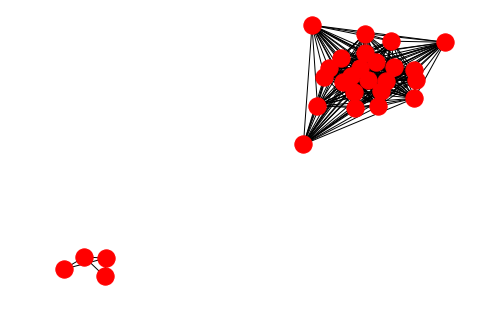

'With an increasingly favorable macro backdrop, you have strong growth demand.'
'Just because they’re big cap doesn’t mean they’re safe,' he added.
Investors are wondering what’s next.


In [105]:
summary=summarize(Text, 3)
for sent in summary :
    print(sent)